<a href="https://colab.research.google.com/github/zanz-byte/Deep_Learning_Model/blob/main/Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train a Simple TensorFlow Lite for Microcontrollers model

This notebook demonstrates the process of training a 2.5 kB model using TensorFlow and converting it for use with TensorFlow Lite for Microcontrollers. 

Deep learning networks learn to model patterns in underlying data. Here, we're going to train a network to model data generated by a [tanh] (https://en.wikipedia.org/wiki/Tanhc_function) and [arctan] (https://en.wikipedia.org/wiki/Inverse_trigonometric_functions) function. This will result in a model that can take a value, `x`, and predict its tanh and arctan, `y`.

The model created in this notebook is modified from the [hello_world](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/lite/micro/examples/hello_world) example for [TensorFlow Lite for MicroControllers](https://www.tensorflow.org/lite/microcontrollers/overview).

This code uses 4 scenarios of 2 function (tanh & arctan) in each model to analyze:

Scenario 1:
1. Tanh function: 1 input with 8 neurons, 1 output
2. Arctan function: 1 input with 8 neurons, 1 output

Scenario 2:
3. Tanh function: 1 input with 16 neurons, 1 output
4. Arctan function: 1 input with 16 neurons, 1 output

Scenario 3:
5. Tanh function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output
6. Arctan function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output

Scenario 4:
7. Tanh function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output
8. Arctan function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/train/train_hello_world_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/train/train_hello_world_model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# Setup environment
Install Dependencies

In [ ]:
# Define paths to model files
import os
# Create directory file 'models/' to save model in the disk (computer)
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)

MODEL_TF_1 = MODELS_DIR + 'model_1'
MODEL_TF_2 = MODELS_DIR + 'model_2'
MODEL_TF_3 = MODELS_DIR + 'model_3'
MODEL_TF_4 = MODELS_DIR + 'model_4'
MODEL_TF_5 = MODELS_DIR + 'model_5'
MODEL_TF_6 = MODELS_DIR + 'model_6'
MODEL_TF_7 = MODELS_DIR + 'model_7'
MODEL_TF_8 = MODELS_DIR + 'model_8'

! pip install tensorflow==2.4.0

# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Dataset


## 1. Generate data
The code in the following cell will generate a set of random `x` values, calculate their tanh & arctan values, and display them on a graph.

Generate 1000 data samples for 4 scenarios (tanh & arctan):

Scenario 1:
1. Tanh function: 1 input with 8 neurons, 1 output
2. Arctan function: 1 input with 8 neurons, 1 output

Scenario 2:
3. Tanh function: 1 input with 16 neurons, 1 output
4. Arctan function: 1 input with 16 neurons, 1 output

Scenario 3:
5. Tanh function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output
6. Arctan function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output

Scenario 4:
7. Tanh function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output
8. Arctan function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output

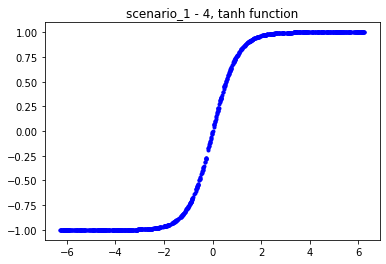

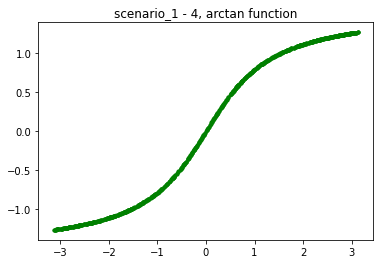

In [ ]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# -2π to 2π, which covers a complete tanh wave oscillation
# -2(π/2) to 2(π/2), which covers a complete arctan wave oscillation

# scenario 1
x_1_values = np.random.uniform(
    low=-2*math.pi, high=2*math.pi, size=SAMPLES).astype(np.float32)
x_2_values = np.random.uniform(
    low=-2*(math.pi/2), high=2*(math.pi/2), size=SAMPLES).astype(np.float32)

# scenario 2
x_3_values = np.random.uniform(
    low=-2*math.pi, high=2*math.pi, size=SAMPLES).astype(np.float32)
x_4_values = np.random.uniform(
    low=-2*(math.pi/2), high=2*(math.pi/2), size=SAMPLES).astype(np.float32)

# scenario 3
x_5_values = np.random.uniform(
    low=-2*math.pi, high=2*math.pi, size=SAMPLES).astype(np.float32)
x_6_values = np.random.uniform(
    low=-2*(math.pi/2), high=2*(math.pi/2), size=SAMPLES).astype(np.float32)

# scenario 4
x_7_values = np.random.uniform(
    low=-2*math.pi, high=2*math.pi, size=SAMPLES).astype(np.float32)
x_8_values = np.random.uniform(
    low=-2*(math.pi/2), high=2*(math.pi/2), size=SAMPLES).astype(np.float32)

# Shuffle the values for tanh and arctan to guarantee they're not in order

# scenario 1
np.random.shuffle(x_1_values)
np.random.shuffle(x_2_values)

# scenario 2
np.random.shuffle(x_3_values)
np.random.shuffle(x_4_values)

# scenario 3
np.random.shuffle(x_5_values)
np.random.shuffle(x_6_values)

# scenario 4
np.random.shuffle(x_7_values)
np.random.shuffle(x_8_values)

# Calculate the corresponding tanh values
# Calculate the corresponding arctan values

# scenario 1
y_1_values = np.tanh(x_1_values).astype(np.float32)
y_2_values = np.arctan(x_2_values).astype(np.float32)

# scenario 2
y_3_values = np.tanh(x_3_values).astype(np.float32)
y_4_values = np.arctan(x_4_values).astype(np.float32)

# scenario 3
y_5_values = np.tanh(x_5_values).astype(np.float32)
y_6_values = np.arctan(x_6_values).astype(np.float32)

# scenario 4
y_7_values = np.tanh(x_7_values).astype(np.float32)
y_8_values = np.arctan(x_8_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
# Plot our data. The 'g.' argument tells the library to print green dots.

# scenario 1 - 4
plt.title('scenario_1 - 4, tanh function')
plt.plot(x_1_values, y_1_values, 'b.')
plt.show()

plt.title('scenario_1 - 4, arctan function')
plt.plot(x_2_values, y_2_values, 'g.')
plt.show()


## 2. Add Noise
Since it was generated directly by the tanh and arctan function, our data fits a nice, smooth curve.

However, machine learning models are good at extracting underlying meaning from messy, real world data. To demonstrate this, we can add some noise to our data to approximate something more life-like.

In the following cell, we'll add some random noise to each value for 4 scenarios (tanh & arctan) , then draw a new graph:

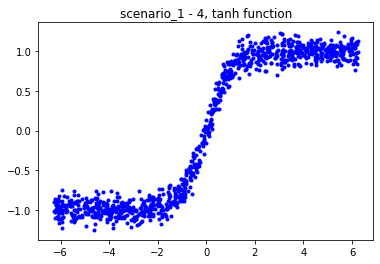

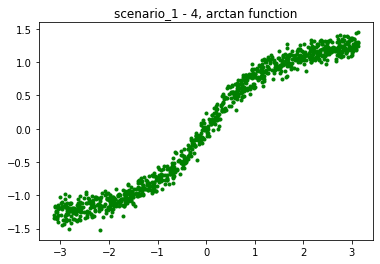

In [ ]:
# Add a small random number to each y value

# scenario 1
y_1_values += 0.1 * np.random.randn(*y_1_values.shape)
y_2_values += 0.1 * np.random.randn(*y_2_values.shape)

# scenario 2
y_3_values += 0.1 * np.random.randn(*y_3_values.shape)
y_4_values += 0.1 * np.random.randn(*y_4_values.shape)

# scenario 3
y_5_values += 0.1 * np.random.randn(*y_5_values.shape)
y_6_values += 0.1 * np.random.randn(*y_6_values.shape)

# scenario 4
y_7_values += 0.1 * np.random.randn(*y_7_values.shape)
y_8_values += 0.1 * np.random.randn(*y_8_values.shape)

# Plot our data

# scenario 1 - 4
plt.title('scenario_1 - 4, tanh function')
plt.plot(x_1_values, y_1_values, 'b.')
plt.show()

plt.title('scenario_1 - 4, arctan function')
plt.plot(x_2_values, y_2_values, 'g.')
plt.show()

## 3. Split the Data
We now have a noisy dataset that approximates real world data. We'll be using this to train our model.

To evaluate the accuracy of the model we train, we'll need to compare its predictions to real data and check how well they match up. This evaluation happens during training (where it is referred to as validation) and after training (referred to as testing) It's important in both cases that we use fresh data that was not already used to train the model.

The data is split as follows:
  1. Training: 60%
  2. Validation: 20%
  3. Testing: 20% 

The following code will split our data for 4 scenarios (tanh & arctan) and then plots each set as a different color:

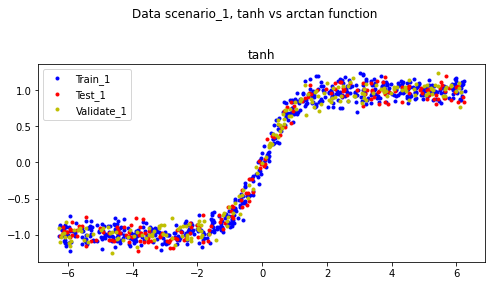

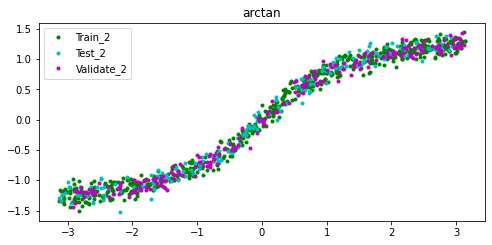

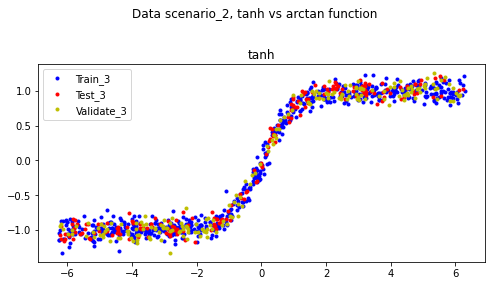

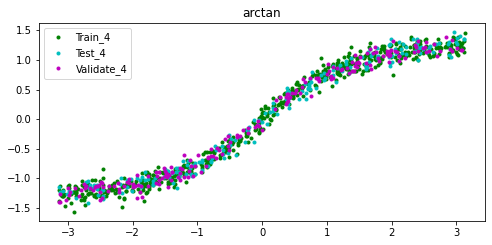

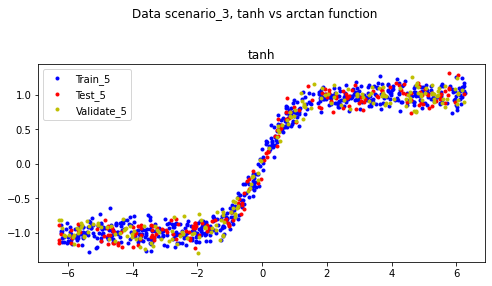

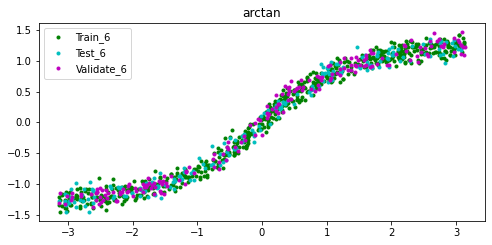

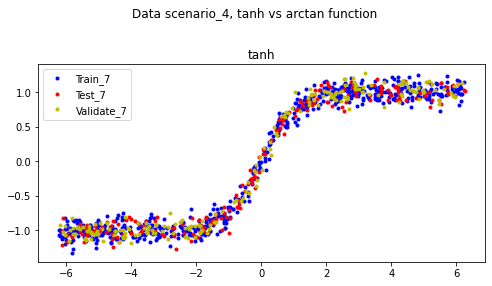

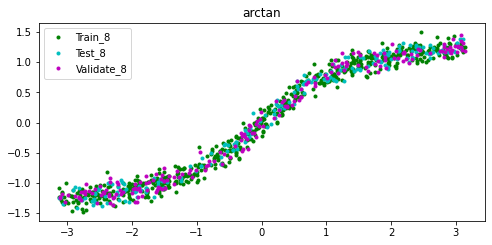

In [ ]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.

# scenario 1
TRAIN_1_SPLIT =  int(0.6 * SAMPLES)
TEST_1_SPLIT = int(0.2 * SAMPLES + TRAIN_1_SPLIT)

TRAIN_2_SPLIT =  int(0.6 * SAMPLES)
TEST_2_SPLIT = int(0.2 * SAMPLES + TRAIN_2_SPLIT)

# scenario 2
TRAIN_3_SPLIT =  int(0.6 * SAMPLES)
TEST_3_SPLIT = int(0.2 * SAMPLES + TRAIN_3_SPLIT)

TRAIN_4_SPLIT =  int(0.6 * SAMPLES)
TEST_4_SPLIT = int(0.2 * SAMPLES + TRAIN_4_SPLIT)

# scenario 3
TRAIN_5_SPLIT =  int(0.6 * SAMPLES)
TEST_5_SPLIT = int(0.2 * SAMPLES + TRAIN_5_SPLIT)

TRAIN_6_SPLIT =  int(0.6 * SAMPLES)
TEST_6_SPLIT = int(0.2 * SAMPLES + TRAIN_6_SPLIT)

# scenario 4
TRAIN_7_SPLIT =  int(0.6 * SAMPLES)
TEST_7_SPLIT = int(0.2 * SAMPLES + TRAIN_7_SPLIT)

TRAIN_8_SPLIT =  int(0.6 * SAMPLES)
TEST_8_SPLIT = int(0.2 * SAMPLES + TRAIN_8_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.

# scenario 1
x_1_train, x_1_test, x_1_validate = np.split(x_1_values, [TRAIN_1_SPLIT, TEST_1_SPLIT])
y_1_train, y_1_test, y_1_validate = np.split(y_1_values, [TRAIN_1_SPLIT, TEST_1_SPLIT])

x_2_train, x_2_test, x_2_validate = np.split(x_2_values, [TRAIN_2_SPLIT, TEST_2_SPLIT])
y_2_train, y_2_test, y_2_validate = np.split(y_2_values, [TRAIN_2_SPLIT, TEST_2_SPLIT])

# scenario 2
x_3_train, x_3_test, x_3_validate = np.split(x_3_values, [TRAIN_3_SPLIT, TEST_3_SPLIT])
y_3_train, y_3_test, y_3_validate = np.split(y_3_values, [TRAIN_3_SPLIT, TEST_3_SPLIT])

x_4_train, x_4_test, x_4_validate = np.split(x_4_values, [TRAIN_4_SPLIT, TEST_4_SPLIT])
y_4_train, y_4_test, y_4_validate = np.split(y_4_values, [TRAIN_4_SPLIT, TEST_4_SPLIT])

# scenario 3
x_5_train, x_5_test, x_5_validate = np.split(x_5_values, [TRAIN_5_SPLIT, TEST_5_SPLIT])
y_5_train, y_5_test, y_5_validate = np.split(y_5_values, [TRAIN_5_SPLIT, TEST_5_SPLIT])

x_6_train, x_6_test, x_6_validate = np.split(x_6_values, [TRAIN_6_SPLIT, TEST_6_SPLIT])
y_6_train, y_6_test, y_6_validate = np.split(y_6_values, [TRAIN_6_SPLIT, TEST_6_SPLIT])

# scenario 4
x_7_train, x_7_test, x_7_validate = np.split(x_7_values, [TRAIN_7_SPLIT, TEST_7_SPLIT])
y_7_train, y_7_test, y_7_validate = np.split(y_7_values, [TRAIN_7_SPLIT, TEST_7_SPLIT])

x_8_train, x_8_test, x_8_validate = np.split(x_8_values, [TRAIN_8_SPLIT, TEST_8_SPLIT])
y_8_train, y_8_test, y_8_validate = np.split(y_8_values, [TRAIN_8_SPLIT, TEST_8_SPLIT])

# Double check that our splits add up correctly

# scenario 1
assert (x_1_train.size + x_1_validate.size + x_1_test.size) ==  SAMPLES
assert (x_2_train.size + x_2_validate.size + x_2_test.size) ==  SAMPLES

# scenario 2
assert (x_3_train.size + x_3_validate.size + x_3_test.size) ==  SAMPLES
assert (x_4_train.size + x_4_validate.size + x_4_test.size) ==  SAMPLES

# scenario 3
assert (x_5_train.size + x_5_validate.size + x_5_test.size) ==  SAMPLES
assert (x_6_train.size + x_6_validate.size + x_6_test.size) ==  SAMPLES

# scenario 4
assert (x_7_train.size + x_7_validate.size + x_7_test.size) ==  SAMPLES
assert (x_8_train.size + x_8_validate.size + x_8_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:

# scenario 1
plt.figure(figsize=(8, 8))
plt.suptitle('Data scenario_1, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_1_train, y_1_train, 'b.', label="Train_1")
plt.plot(x_1_test, y_1_test, 'r.', label="Test_1")
plt.plot(x_1_validate, y_1_validate, 'y.',label="Validate_1")
plt.title('tanh')
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_2_train, y_2_train, 'g.', label="Train_2")
plt.plot(x_2_test, y_2_test, 'c.', label="Test_2")
plt.plot(x_2_validate, y_2_validate, 'm.', label="Validate_2")
plt.title('arctan')
plt.legend()
plt.show()

# scenario 2
plt.figure(figsize=(8, 8))
plt.suptitle('Data scenario_2, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_3_train, y_3_train, 'b.', label="Train_3")
plt.plot(x_3_test, y_3_test, 'r.', label="Test_3")
plt.plot(x_3_validate, y_3_validate, 'y.',label="Validate_3")
plt.title('tanh')
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_4_train, y_4_train, 'g.', label="Train_4")
plt.plot(x_4_test, y_4_test, 'c.', label="Test_4")
plt.plot(x_4_validate, y_4_validate, 'm.', label="Validate_4")
plt.title('arctan')
plt.legend()
plt.show()

# scenario 3
plt.figure(figsize=(8, 8))
plt.suptitle('Data scenario_3, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_5_train, y_5_train, 'b.', label="Train_5")
plt.plot(x_5_test, y_5_test, 'r.', label="Test_5")
plt.plot(x_5_validate, y_5_validate, 'y.',label="Validate_5")
plt.title('tanh')
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_6_train, y_6_train, 'g.', label="Train_6")
plt.plot(x_6_test, y_6_test, 'c.', label="Test_6")
plt.plot(x_6_validate, y_6_validate, 'm.', label="Validate_6")
plt.title('arctan')
plt.legend()
plt.show()

# scenario 4
plt.figure(figsize=(8, 8))
plt.suptitle('Data scenario_4, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_7_train, y_7_train, 'b.', label="Train_7")
plt.plot(x_7_test, y_7_test, 'r.', label="Test_7")
plt.plot(x_7_validate, y_7_validate, 'y.',label="Validate_7")
plt.title('tanh')
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_8_train, y_8_train, 'g.', label="Train_8")
plt.plot(x_8_test, y_8_test, 'c.', label="Test_8")
plt.plot(x_8_validate, y_8_validate, 'm.', label="Validate_8")
plt.title('arctan')
plt.legend()
plt.show()

# Training
This code uses 4 scenarios of 2 function (tanh & arctan) in each model to training:

Scenario 1:
1. Tanh function: 1 input with 8 neurons, 1 output
2. Arctan function: 1 input with 8 neurons, 1 output

Scenario 2:
3. Tanh function: 1 input with 16 neurons, 1 output
4. Arctan function: 1 input with 16 neurons, 1 output

Scenario 3:
5. Tanh function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output
6. Arctan function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output

Scenario 4:
7. Tanh function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output
8. Arctan function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output

## 1. Design the Model
We're going to build a simple neural network model for 4 scenarios (tanh & arctan) that will take an input value (in this case, `x`) and use it to predict a numeric output value (the tanh and artctan of `x`). This type of problem is called a _regression_. It will use _layers_ of _neurons_ to attempt to learn any patterns underlying the training data, so it can make predictions.

To begin with, we'll define two layers. The first layer takes a single input (our `x` value) and runs it through 8/16 neurons. Based on this input, each neuron will become _activated_ to a certain degree based on its internal state (its _weight_ and _bias_ values). A neuron's degree of activation is expressed as a number.

The activation numbers from our first layer will be fed as inputs to our second layer, which is a single neuron. It will apply its own weights and bias to these inputs and calculate its own activation, which will be output as our `y` value.



In [ ]:
# We'll use Keras to create a simple model architecture for both model
# for 4 scenarios model

# A Sequential model is appropriate for a plain stack of layers 
# where each layer has exactly one input tensor and one output tensor.

# scenario 1
model_1 = tf.keras.Sequential()
model_2 = tf.keras.Sequential()

# scenario 2
model_3 = tf.keras.Sequential()
model_4 = tf.keras.Sequential()

# scenario 3
model_5 = tf.keras.Sequential()
model_6 = tf.keras.Sequential()

# scenario 4
model_7 = tf.keras.Sequential()
model_8 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'tanh' activation function.

# Input layer

# scenario 1
model_1.add(keras.layers.Dense(8, activation='tanh', input_shape=(1,)))
model_2.add(keras.layers.Dense(8, activation='tanh', input_shape=(1,)))

# scenario 2
model_3.add(keras.layers.Dense(16, activation='tanh', input_shape=(1,)))
model_4.add(keras.layers.Dense(16, activation='tanh', input_shape=(1,)))

# scenario 3
model_5.add(keras.layers.Dense(8, activation='tanh', input_shape=(1,)))
model_6.add(keras.layers.Dense(8, activation='tanh', input_shape=(1,)))

# scenario 4
model_7.add(keras.layers.Dense(16, activation='tanh', input_shape=(1,)))
model_8.add(keras.layers.Dense(16, activation='tanh', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations

# 1st hidden layer

# scenario 3
model_5.add(keras.layers.Dense(8, activation='tanh'))
model_6.add(keras.layers.Dense(8, activation='tanh'))

# scenario 4
model_7.add(keras.layers.Dense(16, activation='tanh'))
model_8.add(keras.layers.Dense(16, activation='tanh'))

# Final layer is a single neuron, since we want to output a single value

# output layer

# scenario 1
model_1.add(keras.layers.Dense(1))
model_2.add(keras.layers.Dense(1))

# scenario 2
model_3.add(keras.layers.Dense(1))
model_4.add(keras.layers.Dense(1))

# scenario 3
model_5.add(keras.layers.Dense(1))
model_6.add(keras.layers.Dense(1))

# scenario 4
model_7.add(keras.layers.Dense(1))
model_8.add(keras.layers.Dense(1))

# Compile the model using the standard 'adamax' optimizer and the mean squared error or 'mse' loss function for regression.

# scenario 1
model_1.compile(optimizer='adamax', loss='mse', metrics=['mae'])
model_2.compile(optimizer='adamax', loss='mse', metrics=['mae'])

# scenario 2
model_3.compile(optimizer='adamax', loss='mse', metrics=['mae'])
model_4.compile(optimizer='adamax', loss='mse', metrics=['mae'])

# scenario 3
model_5.compile(optimizer='adamax', loss='mse', metrics=['mae'])
model_6.compile(optimizer='adamax', loss='mse', metrics=['mae'])

# scenario 4
model_7.compile(optimizer='adamax', loss='mse', metrics=['mae'])
model_8.compile(optimizer='adamax', loss='mse', metrics=['mae'])

## 2. Train the Model
Once we've defined the model, we can use our data to _train_ it for 4 scenarios (tanh & arctan). Training involves passing an `x` value into the neural network, checking how far the network's output deviates from the expected `y` value, and adjusting the neurons' weights and biases so that the output is more likely to be correct the next time.

Training runs this process on the full dataset multiple times, and each full run-through is known as an _epoch_. The number of epochs to run during training is a parameter we can set.

During each epoch, data is run through the network in multiple _batches_. Each batch, several pieces of data are passed into the network, producing output values. These outputs' correctness is measured in aggregate and the network's weights and biases are adjusted accordingly, once per batch. The _batch size_ is also a parameter we can set.

The code in the following cell uses the `x` and `y` values from our training data to train the model. It runs for 500 _epochs_, with 64 pieces of data in each _batch_. We also pass in some data for _validation_. As you will see when you run the cell, training can take a while to complete:

In [ ]:
# Train both model on our training data while validating on our validation set

# scenario 1
history_1 = model_1.fit(x_1_train, y_1_train, epochs=500, batch_size=64,
                        validation_data=(x_1_validate, y_1_validate))
history_2 = model_2.fit(x_2_train, y_2_train, epochs=500, batch_size=64,
                        validation_data=(x_2_validate, y_2_validate))

# scenario 2
history_3 = model_3.fit(x_1_train, y_1_train, epochs=500, batch_size=64,
                        validation_data=(x_1_validate, y_1_validate))
history_4 = model_4.fit(x_2_train, y_2_train, epochs=500, batch_size=64,
                        validation_data=(x_2_validate, y_2_validate))

# scenario 3
history_5 = model_5.fit(x_1_train, y_1_train, epochs=500, batch_size=64,
                        validation_data=(x_1_validate, y_1_validate))
history_6 = model_6.fit(x_2_train, y_2_train, epochs=500, batch_size=64,
                        validation_data=(x_2_validate, y_2_validate))

# scenario 4
history_7 = model_7.fit(x_1_train, y_1_train, epochs=500, batch_size=64,
                        validation_data=(x_1_validate, y_1_validate))
history_8 = model_8.fit(x_2_train, y_2_train, epochs=500, batch_size=64,
                        validation_data=(x_2_validate, y_2_validate))

# Save the model to disk
model_1.save(MODEL_TF_1)
model_2.save(MODEL_TF_2)
model_3.save(MODEL_TF_3)
model_4.save(MODEL_TF_4)
model_5.save(MODEL_TF_5)
model_6.save(MODEL_TF_6)
model_7.save(MODEL_TF_7)
model_8.save(MODEL_TF_8)

Streaming output truncated to the last 5000 lines.
Epoch 5/500
10/10 [==============================] - 0s 9ms/step - loss: 0.4924 - mae: 0.6464 - val_loss: 0.4100 - val_mae: 0.6009
Epoch 6/500
10/10 [==============================] - 0s 8ms/step - loss: 0.3769 - mae: 0.5688 - val_loss: 0.3207 - val_mae: 0.5315
Epoch 7/500
10/10 [==============================] - 0s 8ms/step - loss: 0.3050 - mae: 0.5102 - val_loss: 0.2501 - val_mae: 0.4693
Epoch 8/500
10/10 [==============================] - 0s 8ms/step - loss: 0.2344 - mae: 0.4506 - val_loss: 0.1952 - val_mae: 0.4143
Epoch 9/500
10/10 [==============================] - 0s 9ms/step - loss: 0.1914 - mae: 0.4077 - val_loss: 0.1522 - val_mae: 0.3650
Epoch 10/500
10/10 [==============================] - 0s 9ms/step - loss: 0.1418 - mae: 0.3459 - val_loss: 0.1189 - val_mae: 0.3212
Epoch 11/500
10/10 [==============================] - 0s 8ms/step - loss: 0.1144 - mae: 0.3114 - val_loss: 0.0929 - val_mae: 0.2821
Epoch 12/500
10/10 [==========

## 3. Plot Metrics

### 1. Loss (or Mean Squared Error)
During training for 4 scenarios (tanh & arctan), the model's performance is constantly being measured against both our training data and the validation data that we set aside earlier. Training produces a log of data that tells us how the model's performance changed over the course of the training process.

The following cells will display some of that data in a graphical form:

<Figure size 432x288 with 0 Axes>

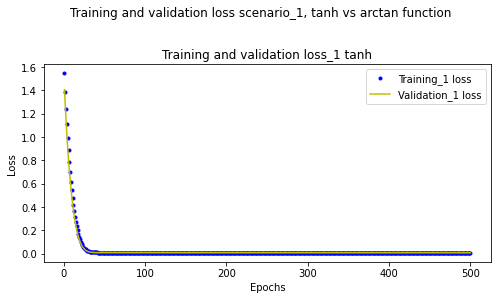

<Figure size 432x288 with 0 Axes>

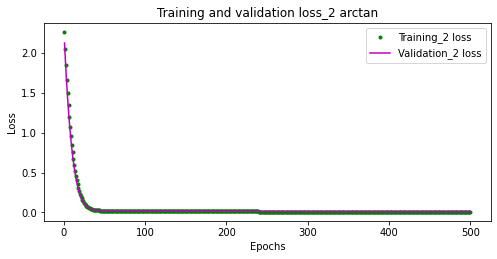

<Figure size 432x288 with 0 Axes>

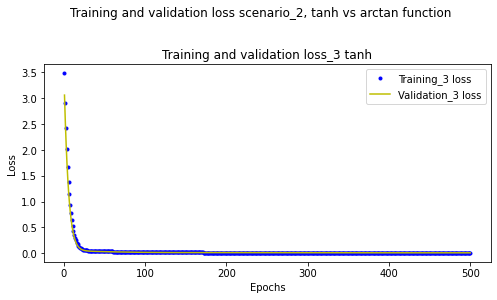

<Figure size 432x288 with 0 Axes>

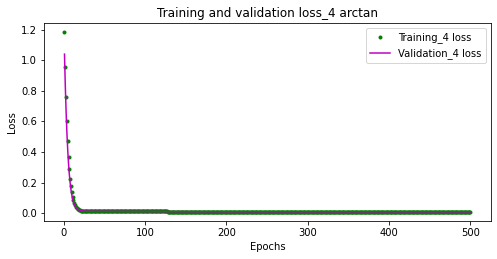

<Figure size 432x288 with 0 Axes>

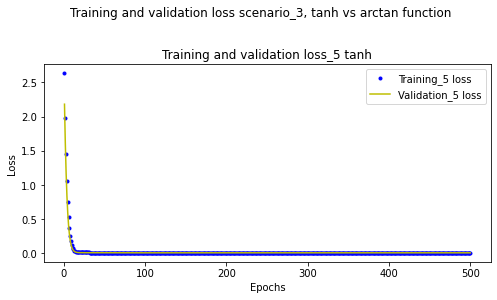

<Figure size 432x288 with 0 Axes>

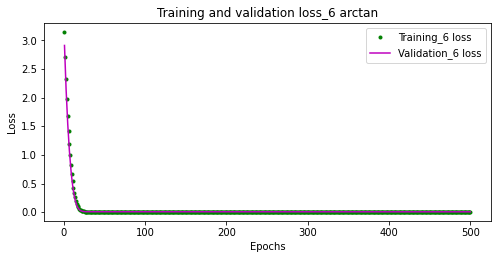

<Figure size 432x288 with 0 Axes>

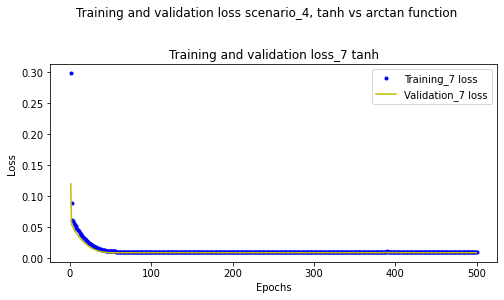

<Figure size 432x288 with 0 Axes>

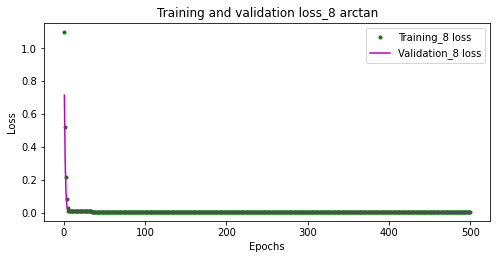

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
# Create training and validation object to store loss and val_loss 
# from both model (sinh & arctan)

# scenario 1
train_1_loss = history_1.history['loss']
val_1_loss = history_1.history['val_loss']

train_2_loss = history_2.history['loss']
val_2_loss = history_2.history['val_loss']

# scenario 2
train_3_loss = history_3.history['loss']
val_3_loss = history_3.history['val_loss']

train_4_loss = history_4.history['loss']
val_4_loss = history_4.history['val_loss']

# scenario 3
train_5_loss = history_5.history['loss']
val_5_loss = history_5.history['val_loss']

train_6_loss = history_6.history['loss']
val_6_loss = history_6.history['val_loss']

# scenario 4
train_7_loss = history_7.history['loss']
val_7_loss = history_7.history['val_loss']

train_8_loss = history_8.history['loss']
val_8_loss = history_8.history['val_loss']

# set how many iteration to train or validate the model

# scenario 1
epochs_1 = range(1, len(train_1_loss) + 1)
epochs_2 = range(1, len(train_2_loss) + 1)

# scenario 2
epochs_3 = range(1, len(train_3_loss) + 1)
epochs_4 = range(1, len(train_4_loss) + 1)

# scenario 3
epochs_5 = range(1, len(train_5_loss) + 1)
epochs_6 = range(1, len(train_6_loss) + 1)

# scenario 4
epochs_7 = range(1, len(train_7_loss) + 1)
epochs_8 = range(1, len(train_8_loss) + 1)

# Create graph of each model

# scenario 1
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_1, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_1, train_1_loss, 'b.', label='Training_1 loss')
plt.plot(epochs_1, val_1_loss, 'y', label='Validation_1 loss')
plt.title('Training and validation loss_1 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_2, train_2_loss, 'g.', label='Training_2 loss')
plt.plot(epochs_2, val_2_loss, 'm', label='Validation_2 loss')
plt.title('Training and validation loss_2 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 2
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_2, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_3, train_3_loss, 'b.', label='Training_3 loss')
plt.plot(epochs_3, val_3_loss, 'y', label='Validation_3 loss')
plt.title('Training and validation loss_3 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_4, train_4_loss, 'g.', label='Training_4 loss')
plt.plot(epochs_4, val_4_loss, 'm', label='Validation_4 loss')
plt.title('Training and validation loss_4 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 3
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_3, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_5, train_5_loss, 'b.', label='Training_5 loss')
plt.plot(epochs_5, val_5_loss, 'y', label='Validation_5 loss')
plt.title('Training and validation loss_5 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_6, train_6_loss, 'g.', label='Training_6 loss')
plt.plot(epochs_6, val_6_loss, 'm', label='Validation_6 loss')
plt.title('Training and validation loss_6 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 4
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_4, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_7, train_7_loss, 'b.', label='Training_7 loss')
plt.plot(epochs_7, val_7_loss, 'y', label='Validation_7 loss')
plt.title('Training and validation loss_7 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_8, train_8_loss, 'g.', label='Training_8 loss')
plt.plot(epochs_8, val_8_loss, 'm', label='Validation_8 loss')
plt.title('Training and validation loss_8 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The graph shows the _loss_ (or the difference between the model's predictions and the actual data) for each epoch. There are several ways to calculate loss, and the method we have used is _mean squared error_. There is a distinct loss value given for the training and the validation data.

As we can see, the amount of loss rapidly decreases over the first 200 epochs, before flattening out. This means that the model is improving and producing more accurate predictions!

Our goal is to stop training when either the model is no longer improving, or when the _training loss_ is less than the _validation loss_, which would mean that the model has learned to predict the training data so well that it can no longer generalize to new data.

To make the flatter part of the graph more readable, let's skip the first 200 epochs:

<Figure size 432x288 with 0 Axes>

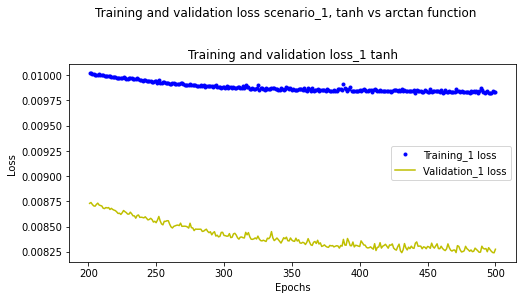

<Figure size 432x288 with 0 Axes>

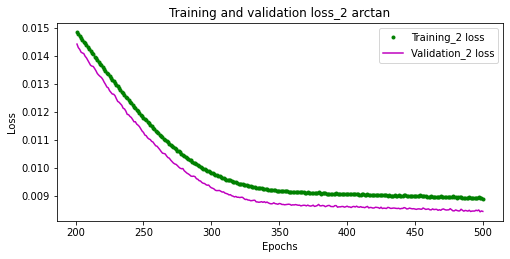

<Figure size 432x288 with 0 Axes>

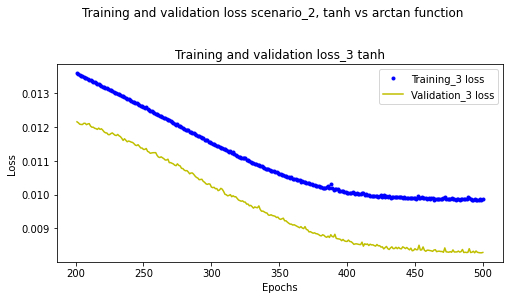

<Figure size 432x288 with 0 Axes>

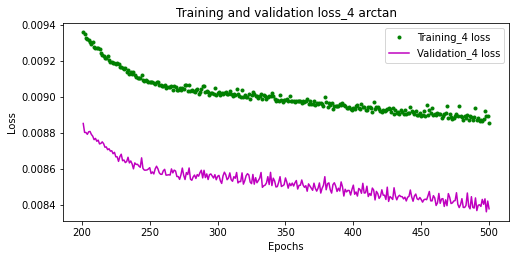

<Figure size 432x288 with 0 Axes>

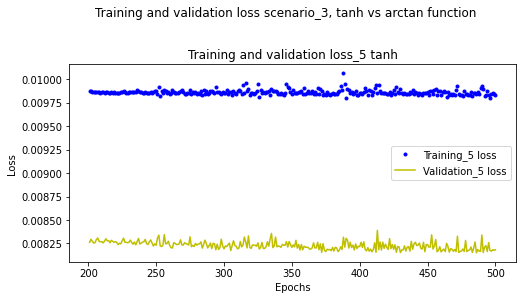

<Figure size 432x288 with 0 Axes>

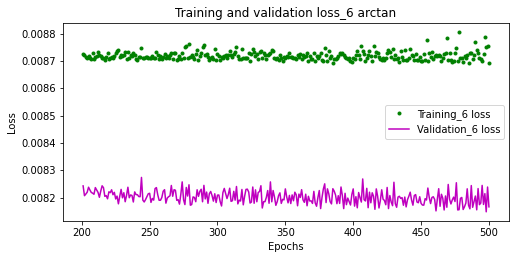

<Figure size 432x288 with 0 Axes>

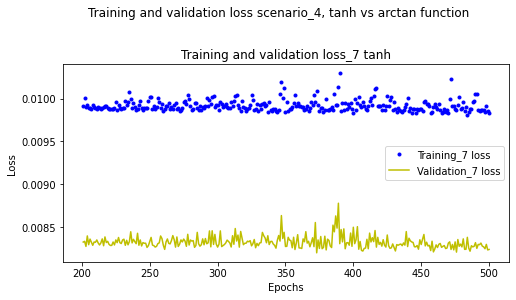

<Figure size 432x288 with 0 Axes>

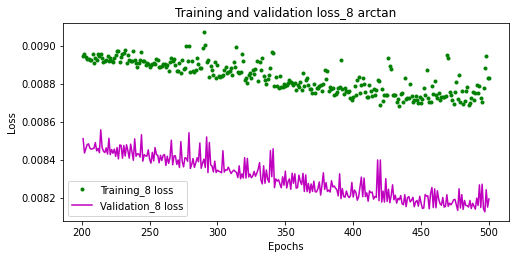

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 200

# scenario 1
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_1, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_1[SKIP:], train_1_loss[SKIP:], 'b.', label='Training_1 loss')
plt.plot(epochs_1[SKIP:], val_1_loss[SKIP:], 'y', label='Validation_1 loss')
plt.title('Training and validation loss_1 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_2[SKIP:], train_2_loss[SKIP:], 'g.', label='Training_2 loss')
plt.plot(epochs_2[SKIP:], val_2_loss[SKIP:], 'm', label='Validation_2 loss')
plt.title('Training and validation loss_2 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 2
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_2, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_3[SKIP:], train_3_loss[SKIP:], 'b.', label='Training_3 loss')
plt.plot(epochs_3[SKIP:], val_3_loss[SKIP:], 'y', label='Validation_3 loss')
plt.title('Training and validation loss_3 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_4[SKIP:], train_4_loss[SKIP:], 'g.', label='Training_4 loss')
plt.plot(epochs_4[SKIP:], val_4_loss[SKIP:], 'm', label='Validation_4 loss')
plt.title('Training and validation loss_4 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 3
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_3, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_5[SKIP:], train_5_loss[SKIP:], 'b.', label='Training_5 loss')
plt.plot(epochs_5[SKIP:], val_5_loss[SKIP:], 'y', label='Validation_5 loss')
plt.title('Training and validation loss_5 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_6[SKIP:], train_6_loss[SKIP:], 'g.', label='Training_6 loss')
plt.plot(epochs_6[SKIP:], val_6_loss[SKIP:], 'm', label='Validation_6 loss')
plt.title('Training and validation loss_6 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 4
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_4, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_7[SKIP:], train_7_loss[SKIP:], 'b.', label='Training_7 loss')
plt.plot(epochs_7[SKIP:], val_7_loss[SKIP:], 'y', label='Validation_7 loss')
plt.title('Training and validation loss_7 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_8[SKIP:], train_8_loss[SKIP:], 'g.', label='Training_8 loss')
plt.plot(epochs_8[SKIP:], val_8_loss[SKIP:], 'm', label='Validation_8 loss')
plt.title('Training and validation loss_8 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the plot, we can see that loss continues to reduce until around 200 epochs, at which point it is mostly stable. This means that there's no need to train our network beyond 200 epochs.

However, we can also see that the lowest loss value is still around 0.0081. This means that our network's predictions are off by an average of ~0.081%. In addition, the validation loss values jump around a lot, and is sometimes even higher.

This code uses 4 scenarios of 2 function (tanh & arctan) in each model to analyze:

Scenario 1:
1. Tanh function: 1 input with 8 neurons, 1 output

train_1_loss = 0.0098
val_1_loss = 0.0083

train_1_loss = loss value saturated from 400 epoch
val_1_loss = loss value saturated from 400 epoch

train_1_loss > val_1_loss = good compromise or not overfitting

2. Arctan function: 1 input with 8 neurons, 1 output

train_2_loss = 0.0089
val_2_loss = 0.0083

train_2_loss = loss value saturated from 450 epoch
val_2_loss = loss value saturated from 450 epoch

train_2_loss > val_2_loss = good compromise or not overfitting

Scenario 2:
3. Tanh function: 1 input with 16 neurons, 1 output

train_3_loss = 0.0098
val_3_loss = 0.0083

train_3_loss = loss value saturated from 450 epoch
val_3_loss = loss value saturated from 450 epoch

train_3_loss > val_3_loss = good compromise or not overfitting

4. Arctan function: 1 input with 16 neurons, 1 output

train_4_loss = 0.00885
val_4_loss = 0.00838

train_4_loss = loss value haven't saturated from 500 epoch
val_4_loss = loss value haven't saturated from 500 epoch

train_4_loss > val_4_loss = good compromise or not overfitting

Scenario 3:
5. Tanh function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output

train_5_loss = 0.00976
val_5_loss = 0.00820

train_5_loss = loss value saturated from 200 epoch
val_5_loss = loss value saturated from 200 epoch

train_5_loss > val_5_loss = good compromise or not overfitting

6. Arctan function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output

train_6_loss = 0.00865
val_6_loss = 0.00815

train_6_loss = loss value saturated from 200 epoch
val_6_loss = loss value saturated from 200 epoch

train_6_loss > val_6_loss = good compromise or not overfitting

Scenario 4:
7. Tanh function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output

train_7_loss = 0.00975
val_7_loss = 0.00825

train_7_loss = loss value saturated from 200 epoch
val_7_loss = loss value saturated from 200 epoch

train_7_loss > val_7_loss = good compromise or not overfitting

8. Arctan function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output

train_8_loss = 0.00864
val_8_loss = 0.00818

train_8_loss = loss value saturated from 450 epoch
val_8_loss = loss value saturated from 450 epoch

train_8_loss > val_8_loss = good compromise or not overfitting

Conclusion:
1. tanh MSE > arctan MSE
2. 1 input layer with 8 neurons MSE > 1 input layer with 16 neurons
3. 1 hidden layer with 8 neurons MSE > 1 hidden layer with 16 neurons
4. Higher neurons and hidden layer = Lower MSE
5. Higher neurons and hidden layer = Higher epoch for value to be saturated
6. Arctan function = Higher epoch for value to be saturated

### 2. Mean Absolute Error
To gain more insight into our model's performance we can plot some more data. This time, we'll plot the _mean absolute error_, which is another way of measuring how far the network's predictions are from the actual numbers:

<Figure size 432x288 with 0 Axes>

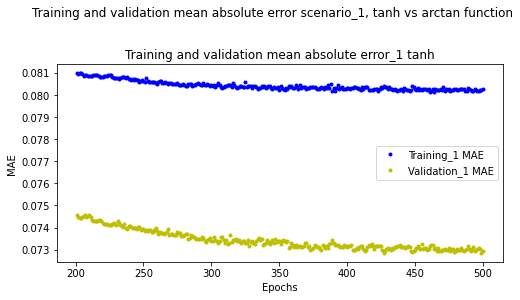

<Figure size 432x288 with 0 Axes>

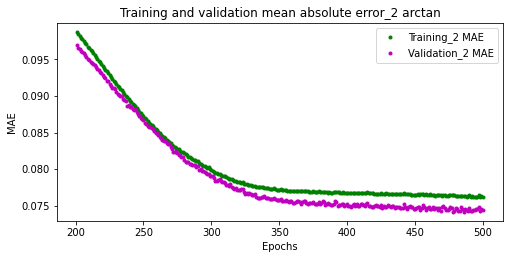

<Figure size 432x288 with 0 Axes>

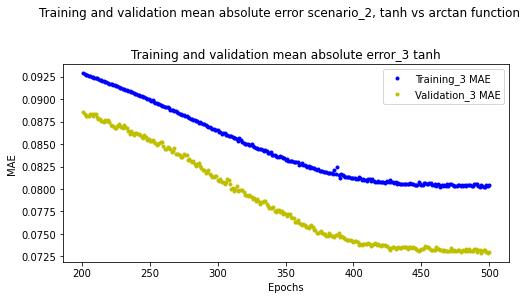

<Figure size 432x288 with 0 Axes>

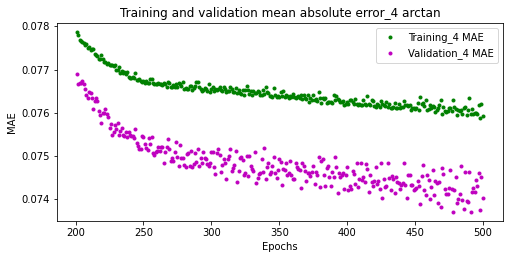

<Figure size 432x288 with 0 Axes>

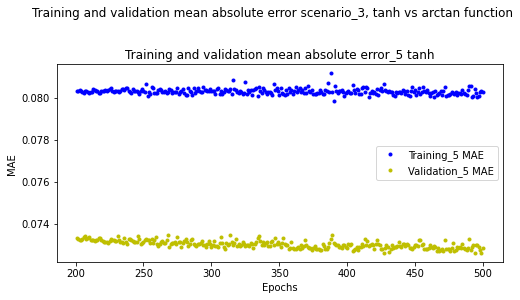

<Figure size 432x288 with 0 Axes>

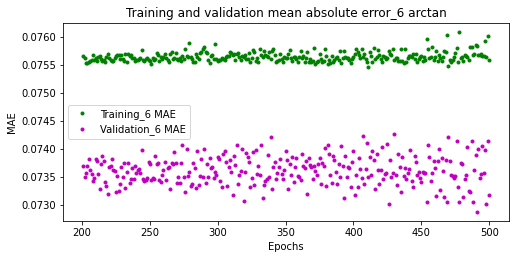

<Figure size 432x288 with 0 Axes>

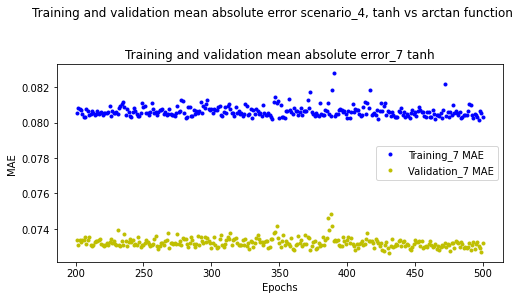

<Figure size 432x288 with 0 Axes>

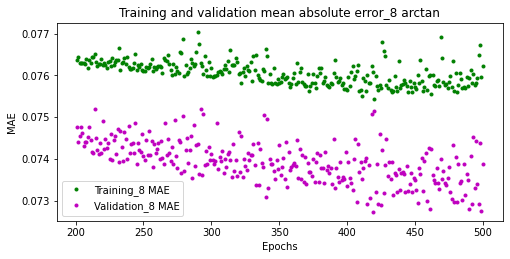

In [ ]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.

# scenario 1
train_1_mae = history_1.history['mae']
val_1_mae = history_1.history['val_mae']

train_2_mae = history_2.history['mae']
val_2_mae = history_2.history['val_mae']

# scenario 2
train_3_mae = history_3.history['mae']
val_3_mae = history_3.history['val_mae']

train_4_mae = history_4.history['mae']
val_4_mae = history_4.history['val_mae']

# scenario 3
train_5_mae = history_5.history['mae']
val_5_mae = history_5.history['val_mae']

train_6_mae = history_6.history['mae']
val_6_mae = history_6.history['val_mae']

# scenario 4
train_7_mae = history_7.history['mae']
val_7_mae = history_7.history['val_mae']

train_8_mae = history_8.history['mae']
val_8_mae = history_8.history['val_mae']

# scenario 1
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation mean absolute error scenario_1, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_1[SKIP:], train_1_mae[SKIP:], 'b.', label='Training_1 MAE')
plt.plot(epochs_1[SKIP:], val_1_mae[SKIP:], 'y.', label='Validation_1 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_1 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_2[SKIP:], train_2_mae[SKIP:], 'g.', label='Training_2 MAE')
plt.plot(epochs_2[SKIP:], val_2_mae[SKIP:], 'm.', label='Validation_2 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_2 arctan')
plt.legend()
plt.show()

# scenario 2
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation mean absolute error scenario_2, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_3[SKIP:], train_3_mae[SKIP:], 'b.', label='Training_3 MAE')
plt.plot(epochs_3[SKIP:], val_3_mae[SKIP:], 'y.', label='Validation_3 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_3 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_4[SKIP:], train_4_mae[SKIP:], 'g.', label='Training_4 MAE')
plt.plot(epochs_4[SKIP:], val_4_mae[SKIP:], 'm.', label='Validation_4 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_4 arctan')
plt.legend()
plt.show()

# scenario 3
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation mean absolute error scenario_3, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_5[SKIP:], train_5_mae[SKIP:], 'b.', label='Training_5 MAE')
plt.plot(epochs_5[SKIP:], val_5_mae[SKIP:], 'y.', label='Validation_5 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_5 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_6[SKIP:], train_6_mae[SKIP:], 'g.', label='Training_6 MAE')
plt.plot(epochs_6[SKIP:], val_6_mae[SKIP:], 'm.', label='Validation_6 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_6 arctan')
plt.legend()
plt.show()

# scenario 4
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation mean absolute error scenario_4, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_7[SKIP:], train_7_mae[SKIP:], 'b.', label='Training_7 MAE')
plt.plot(epochs_7[SKIP:], val_7_mae[SKIP:], 'y.', label='Validation_7 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_7 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_8[SKIP:], train_8_mae[SKIP:], 'g.', label='Training_8 MAE')
plt.plot(epochs_8[SKIP:], val_8_mae[SKIP:], 'm.', label='Validation_8 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_8 arctan')
plt.legend()
plt.show()

This graph of _mean absolute error_ tells another story. We can see that training data shows consistently higher error than validation data, which means that the network may have _good compromise or not overfit_, or learned the training data so smoothly that it can make effective predictions about new data. 

Otherwise, if training data shows consistently lower error than validation data, which means that the network may have _overfit_, or learned the training data so rigidly that it can't make effective predictions about new data.

In addition, the mean absolute error values are quite low, ~0.073 at best, which means some of the model's predictions are at least 7.3% off. A 7.3% error means we are close from accurately modelling the tanh and arctan wave function.

This code uses 4 scenarios of 2 function (tanh & arctan) in each model to analyze:

Scenario 1:
1. Tanh function: 1 input with 8 neurons, 1 output

train_1_loss = 0.080
val_1_loss = 0.072

train_1_loss = loss value saturated from 450 epoch
val_1_loss = loss value saturated from 450 epoch

train_1_loss > val_1_loss = good compromise or not overfitting

2. Arctan function: 1 input with 8 neurons, 1 output

train_2_loss = 0.0762
val_2_loss = 0.0740

train_2_loss = loss value saturated from 450 epoch
val_2_loss = loss value saturated from 450 epoch

train_2_loss > val_2_loss = good compromise or not overfitting

Scenario 2:
3. Tanh function: 1 input with 16 neurons, 1 output

train_3_loss = 0.080
val_3_loss = 0.073

train_3_loss = loss value saturated from 450 epoch
val_3_loss = loss value saturated from 450 epoch

train_3_loss > val_3_loss = good compromise or not overfitting

4. Arctan function: 1 input with 16 neurons, 1 output

train_4_loss = 0.0758
val_4_loss = 0.0735

train_4_loss = loss value saturated from 450 epoch
val_4_loss = loss value saturated from 450 epoch

train_4_loss > val_4_loss = good compromise or not overfitting

Scenario 3:
5. Tanh function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output

train_5_loss = 0.0798
val_5_loss = 0.0728

train_5_loss = loss value saturated from 200 epoch
val_5_loss = loss value saturated from 200 epoch

train_5_loss > val_5_loss = good compromise or not overfitting

6. Arctan function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output

train_6_loss = 0.0754
val_6_loss = 0.0728

train_6_loss = loss value saturated from 200 epoch
val_6_loss = loss value saturated from 200 epoch

train_6_loss > val_6_loss = good compromise or not overfitting

Scenario 4:
7. Tanh function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output

train_7_loss = 0.080
val_7_loss = 0.073

train_7_loss = loss value saturated from 200 epoch
val_7_loss = loss value saturated from 200 epoch

train_7_loss > val_7_loss = good compromise or not overfitting

8. Arctan function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output

train_8_loss = 0.0755
val_8_loss = 0.0728

train_8_loss = loss value saturated from 450 epoch
val_8_loss = loss value saturated from 450 epoch

train_8_loss > val_8_loss = good compromise or not overfitting

Conclusion:
1. tanh MSE > arctan MSE
2. 1 input layer with 8 neurons MSE > 1 input layer with 16 neurons
3. 1 hidden layer with 8 neurons MSE > 1 hidden layer with 16 neurons
4. Higher neurons and hidden layer = Lower MSE
5. Higher neurons and hidden layer = Higher epoch for value to be saturated
6. Arctan function = Higher epoch for value to be saturated

### 3. Actual vs Predicted Outputs
To get more insight into what is happening, let's check its predictions against the test dataset we set aside earlier:

7/7 [==============================] - 0s 2ms/step - loss: 0.0096 - mae: 0.0804


<Figure size 432x288 with 0 Axes>

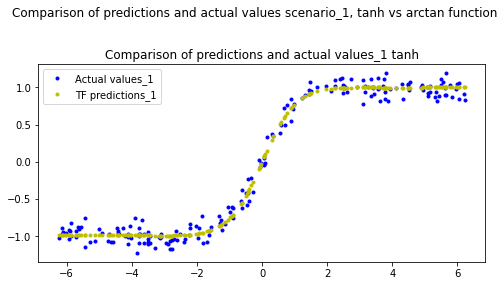

<Figure size 432x288 with 0 Axes>

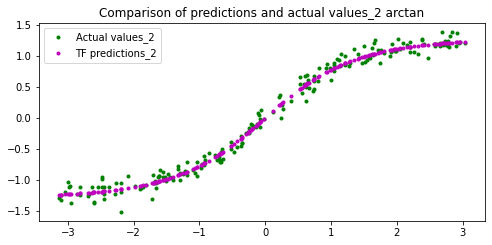

<Figure size 432x288 with 0 Axes>

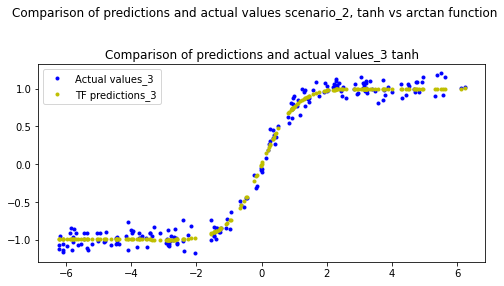

<Figure size 432x288 with 0 Axes>

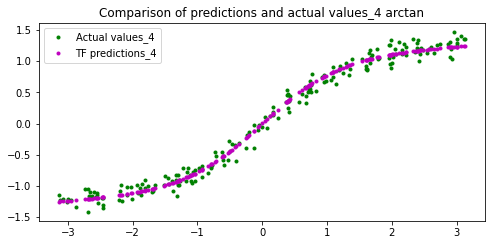

<Figure size 432x288 with 0 Axes>

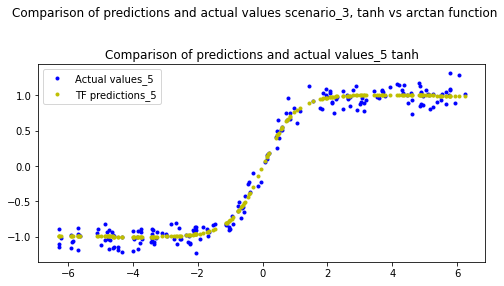

<Figure size 432x288 with 0 Axes>

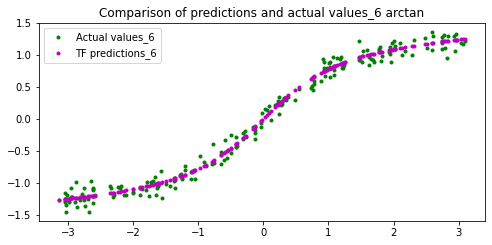

<Figure size 432x288 with 0 Axes>

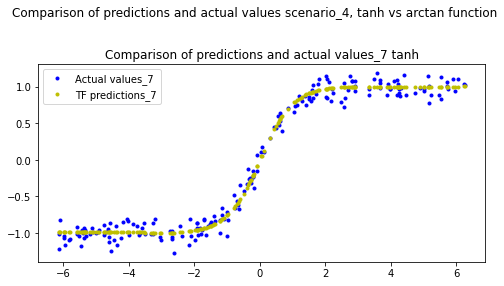

<Figure size 432x288 with 0 Axes>

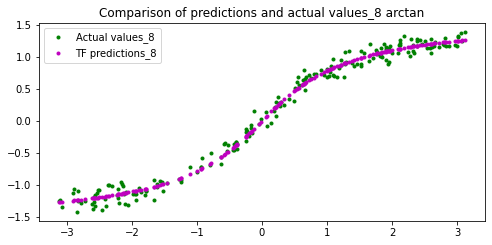

In [ ]:
# Calculate and print the loss on our test dataset

# scenario 1
test_1_loss, test_1_mae = model_1.evaluate(x_1_test, y_1_test)
test_2_loss, test_2_mae = model_2.evaluate(x_2_test, y_2_test)

# scenario 2
test_3_loss, test_3_mae = model_3.evaluate(x_3_test, y_3_test)
test_4_loss, test_4_mae = model_4.evaluate(x_4_test, y_4_test)

# scenario 3
test_5_loss, test_5_mae = model_5.evaluate(x_5_test, y_5_test)
test_6_loss, test_6_mae = model_6.evaluate(x_6_test, y_6_test)

# scenario 4
test_7_loss, test_7_mae = model_7.evaluate(x_7_test, y_7_test)
test_8_loss, test_8_mae = model_8.evaluate(x_8_test, y_8_test)

# Make predictions based on our test dataset

# scenario 1
y_1_test_pred = model_1.predict(x_1_test)
y_2_test_pred = model_2.predict(x_2_test)

# scenario 2
y_3_test_pred = model_3.predict(x_3_test)
y_4_test_pred = model_4.predict(x_4_test)

# scenario 3
y_5_test_pred = model_5.predict(x_5_test)
y_6_test_pred = model_6.predict(x_6_test)

# scenario 4
y_7_test_pred = model_7.predict(x_7_test)
y_8_test_pred = model_8.predict(x_8_test)

# Graph the predictions against the actual values

# scenario 1
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Comparison of predictions and actual values scenario_1, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_1_test, y_1_test, 'b.', label='Actual values_1')
plt.plot(x_1_test, y_1_test_pred, 'y.', label='TF predictions_1')
plt.title('Comparison of predictions and actual values_1 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_2_test, y_2_test, 'g.', label='Actual values_2')
plt.plot(x_2_test, y_2_test_pred, 'm.', label='TF predictions_2')
plt.title('Comparison of predictions and actual values_2 arctan')
plt.legend()
plt.show()

# scenario 2
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Comparison of predictions and actual values scenario_2, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_3_test, y_3_test, 'b.', label='Actual values_3')
plt.plot(x_3_test, y_3_test_pred, 'y.', label='TF predictions_3')
plt.title('Comparison of predictions and actual values_3 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_4_test, y_4_test, 'g.', label='Actual values_4')
plt.plot(x_4_test, y_4_test_pred, 'm.', label='TF predictions_4')
plt.title('Comparison of predictions and actual values_4 arctan')
plt.legend()
plt.show()

# scenario 3
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Comparison of predictions and actual values scenario_3, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_5_test, y_5_test, 'b.', label='Actual values_5')
plt.plot(x_5_test, y_5_test_pred, 'y.', label='TF predictions_5')
plt.title('Comparison of predictions and actual values_5 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_6_test, y_6_test, 'g.', label='Actual values_6')
plt.plot(x_6_test, y_6_test_pred, 'm.', label='TF predictions_6')
plt.title('Comparison of predictions and actual values_6 arctan')
plt.legend()
plt.show()

# scenario 4
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Comparison of predictions and actual values scenario_4, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_7_test, y_7_test, 'b.', label='Actual values_7')
plt.plot(x_7_test, y_7_test_pred, 'y.', label='TF predictions_7')
plt.title('Comparison of predictions and actual values_7 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_8_test, y_8_test, 'g.', label='Actual values_8')
plt.plot(x_8_test, y_8_test_pred, 'm.', label='TF predictions_8')
plt.title('Comparison of predictions and actual values_8 arctan')
plt.legend()
plt.show()

The evaluation metrics we printed show that the model has a low loss and MAE on the test data, and the predictions line up visually with our data fairly well.

The smoothness of this fit suggests that the model have enough capacity to learn the full complexity of the tanh and arctan wave function, so it's able to approximate it in an a complex way. By making our model bigger, we have been able to improve its performance.

The model is almost perfect; its predictions form a smooth tanh and arctan curve. For instance, the line is almost straight when `x` is between -1 and 0. If we wanted to go further, we could try further increasing the capacity of the model, perhaps using some techniques to defend from overfitting.

This code uses 4 scenarios of 2 function (tanh & arctan) in each model to analyze:

Scenario 1:
1. Tanh function: 1 input with 8 neurons, 1 output
2. Arctan function: 1 input with 8 neurons, 1 output

Scenario 2:
3. Tanh function: 1 input with 16 neurons, 1 output
4. Arctan function: 1 input with 16 neurons, 1 output

Scenario 3:
5. Tanh function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output
6. Arctan function: 1 input with 8 neurons, 1 hidden layers with 8 neurons, 1 output

Scenario 4:
7. Tanh function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output
8. Arctan function: 1 input with 16 neurons, 1 hidden layer with 16 neurons, 1 output

Conclusion:
1. Arctan function with tanh activation performance > Tanh function with tanh activation performance
2. Larger model = More smoothness fit
3. Larger model = More capability to learn more complex model
4. Larger model = Higher performance to predict data
5. Larger model = Higher epoch to reach saturated value
6. Larger model = Higher complexity and Longer computational time

However, an important part of machine learning is *knowing when to stop*. This model is good enough for our use case - which is to make some LEDs blink in a pleasing pattern.

